In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
plt.style.use('ggplot')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


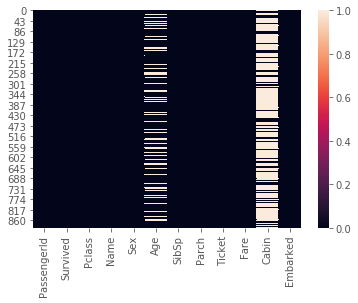

In [4]:
sns.heatmap(train.isna())

In [5]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# if null value assume that person doesn't have a cabin
train['has_cabin'] = ~train.Cabin.isnull()

In [7]:
# map sex to 0 and 1
train['sex_map'] = train.Sex.map({'male': 0, 'female': 1})

In [8]:
# combine SibSp, Parch into one column
train['fam_mem'] = train.SibSp + train.Parch

In [9]:
# drop unneeded columns
train.drop(columns=['Cabin', 'SibSp', 'Parch', 'Ticket', 'PassengerId'], inplace=True)

In [10]:
# don't need names but titles could be useful
train['Title'] = train.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

In [11]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [12]:
train['Title'] = train['Title'].replace(['Don','Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], 'Unique')

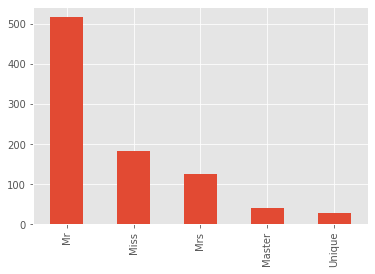

In [13]:
train['Title'].value_counts().plot(kind='bar')

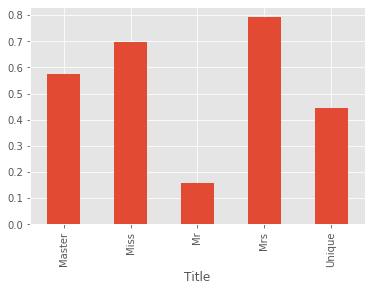

In [50]:
train.groupby('Title').Survived.mean().plot(kind='bar')

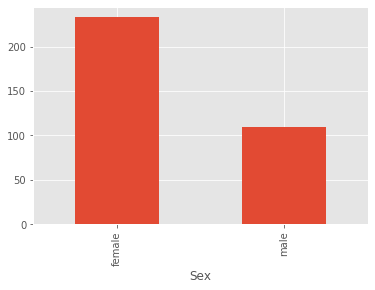

In [14]:
train.groupby('Sex')['Survived'].sum().plot(kind='bar')

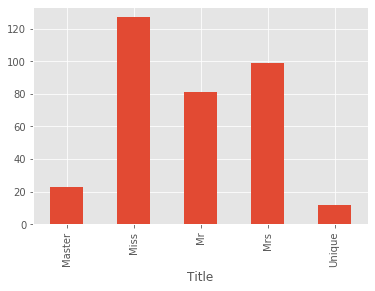

In [15]:
train.groupby('Title')['Survived'].sum().plot(kind='bar')

In [16]:
train.groupby(['Sex', 'Pclass'])['Survived'].sum()

Sex     Pclass
female  1         91
        2         70
        3         72
male    1         45
        2         17
        3         47
Name: Survived, dtype: int64

In [52]:
train.groupby('Embarked').Survived.value_counts(normalize=True)

Embarked  Survived
C         1           0.553571
          0           0.446429
Q         0           0.610390
          1           0.389610
S         0           0.663043
          1           0.336957
Name: Survived, dtype: float64

In [17]:
train.drop('Name', axis=1, inplace=True)

In [18]:
train.drop('Sex', axis=1, inplace=True)

In [19]:
train.head()

,Survived,Pclass,Age,Fare,Embarked,has_cabin,sex_map,fam_mem,Title
0,0,3,22.0,7.2500,S,False,0,1,Mr
1,1,1,38.0,71.2833,C,True,1,1,Mrs
2,1,3,26.0,7.9250,S,False,1,0,Miss
3,1,1,35.0,53.1000,S,True,1,1,Mrs
4,0,3,35.0,8.0500,S,False,0,0,Mr


In [20]:
fare2 = train.Fare

In [21]:
fare2min = fare2.min()

In [22]:
fare2max = fare2.max()

In [23]:
fare2r = fare2max - fare2min

In [24]:
fare22 = (fare2 - fare2min) / fare2r

In [25]:
train['Fare'] = fare22

In [26]:
train.head()

,Survived,Pclass,Age,Fare,Embarked,has_cabin,sex_map,fam_mem,Title
0,0,3,22.0,0.014151,S,False,0,1,Mr
1,1,1,38.0,0.139136,C,True,1,1,Mrs
2,1,3,26.0,0.015469,S,False,1,0,Miss
3,1,1,35.0,0.103644,S,True,1,1,Mrs
4,0,3,35.0,0.015713,S,False,0,0,Mr


In [27]:
train['Age'] = train.Age / 100

In [28]:
train['Fare'] = train.Fare.fillna(train.Fare.median())

In [29]:
train['Age'] = train.Age.fillna(train.Age.median())

In [30]:
data2 = []
for x in train['Age']:
    if x <= 0.18:
        data2.append(True)
    else:
        data2.append(False)
        
train['under_18'] = data2
        

In [31]:
final_train = pd.get_dummies(train, drop_first=True)

In [32]:
final_train.head()

,Survived,Pclass,Age,Fare,has_cabin,sex_map,fam_mem,under_18,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Unique
0,0,3,0.22,0.014151,False,0,1,False,0,1,0,1,0,0
1,1,1,0.38,0.139136,True,1,1,False,0,0,0,0,1,0
2,1,3,0.26,0.015469,False,1,0,False,0,1,1,0,0,0
3,1,1,0.35,0.103644,True,1,1,False,0,1,0,0,1,0
4,0,3,0.35,0.015713,False,0,0,False,0,1,0,1,0,0


In [33]:
def clean_data(data):
    data['has_cabin'] = ~data.Cabin.isnull()
    data['sex_map'] = data.Sex.map({'male': 0, 'female': 1})
    data.drop(columns=['Cabin', 'SibSp', 'Parch', 'Ticket', 'PassengerId'], inplace=True)
    data['Title'] = data.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
    data['Title'] = data['Title'].replace(['Don','Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], 'Unique')
    data.drop('Name', axis=1, inplace=True)
    data.drop('Sex', axis=1, inplace=True)
    fare3 = data['Fare']
    fare23 = (fare3 - fare2min) / fare2r
    data['Fare'] = fare23
    data['Age'] = data.Age / 100
    data['Fare'] = data.Fare.fillna(data.Fare.median())
    data['Age'] = data.Age.fillna(data.Age.median())
    data2 = []
    for x in train['Age']:
        if x <= 0.18:
            data2.append(True)
        else:
            data2.append(False)
        
    train['under_18'] = data2
    return pd.get_dummies(data)
    

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
y = final_train['Survived']

In [36]:
X = final_train.drop('Survived', axis=1)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [38]:
from sklearn.neural_network import MLPClassifier

In [39]:
mlp = MLPClassifier(max_iter=1000, hidden_layer_sizes=[50, 50], alpha=0.1, random_state=42)

In [40]:
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[50, 50], learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [41]:
# neural network
print("Training set score: {}".format(mlp.score(X_train, y_train)))
print("Test set score: {}".format(mlp.score(X_test, y_test)))

Training set score: 0.8547904191616766
Test set score: 0.8430493273542601


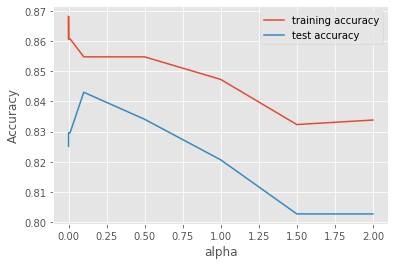

In [42]:
training_accuracy = []
test_accuracy = []

#try alpha 0.0001 to 2
alpha_settings = [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 1.5, 2]

for n_alpha in alpha_settings:
    mlp = MLPClassifier(max_iter=1000, hidden_layer_sizes=[50,50], alpha=n_alpha, random_state=42)
    mlp.fit(X_train, y_train)
    training_accuracy.append(mlp.score(X_train, y_train))
    test_accuracy.append(mlp.score(X_test, y_test))
    
    
plt.plot(alpha_settings, training_accuracy, label='training accuracy')
plt.plot(alpha_settings, test_accuracy, label='test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('alpha')
plt.legend()

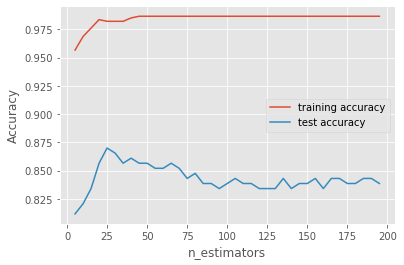

In [145]:
# random forest
from sklearn.ensemble import RandomForestClassifier

training_accuracy = []
test_accuracy = []

#try estimators from 20 to 100
n_estimators_settings = range(5, 200, 5)

for n_estimators in n_estimators_settings:
    rf = RandomForestClassifier(max_depth=19, n_estimators=n_estimators, random_state=0)
    rf.fit(X_train, y_train)
    training_accuracy.append(rf.score(X_train, y_train))
    test_accuracy.append(rf.score(X_test, y_test))
    
    
plt.plot(n_estimators_settings, training_accuracy, label='training accuracy')
plt.plot(n_estimators_settings, test_accuracy, label='test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_estimators')
plt.legend()


In [44]:
def feature_importance(model):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("feature importances")
    plt.ylabel("features")

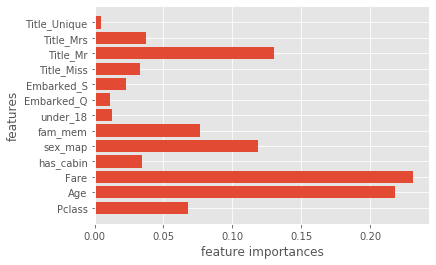

In [45]:
feature_importance(rf)

In [82]:
from sklearn.linear_model import LogisticRegression

In [101]:
lr = LogisticRegression(C=1000, random_state=0, max_iter=10000)
lr.fit(X_train, y_train)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [99]:
print("training set score {}".format(lr.score(X_train, y_train)))
print("test set score {}".format(lr.score(X_test, y_test)))


training set score 0.8338323353293413
test set score 0.8475336322869955


In [162]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(learning_rate=0.1, max_depth=4, min_samples_leaf=17, random_state=0)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=17, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [163]:
print("training set score {}".format(gbc.score(X_train, y_train)))
print("test set score {}".format(gbc.score(X_test, y_test)))

training set score 0.8982035928143712
test set score 0.8654708520179372


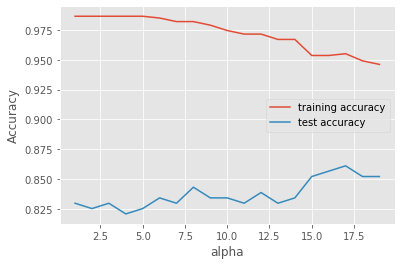

In [146]:
#try leaves from 1 to 20
leaf_settings = range(1, 20, 1)

training_accuracy = []
test_accuracy = []

for n_leafs in leaf_settings:
    gbc = GradientBoostingClassifier(learning_rate=0.1, max_depth=10, min_samples_leaf=n_leafs, random_state=0)
    gbc.fit(X_train, y_train)
    training_accuracy.append(gbc.score(X_train, y_train))
    test_accuracy.append(gbc.score(X_test, y_test))
    
    
plt.plot(leaf_settings, training_accuracy, label='training accuracy')
plt.plot(leaf_settings, test_accuracy, label='test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('alpha')
plt.legend()